In [1]:
from helpers import *
from models import *
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In this notebook I will perform hyperparameter tunning. Display some plots with testing vs training accuracy

# Helper functions

In [2]:
def get_plot_data_lr(training_lr, testing_lr):
    df = pd.DataFrame(training_lr)
    df['K'] = kvalues
    df = df.set_index('K')
    df = df.stack(0).reset_index()
    df.columns = ['K', 'C', 'train_accuracy']
    df_test = pd.DataFrame(testing_lr)
    df_test['K'] = kvalues
    df_test = df_test.set_index('K')
    df_test = df_test.stack(0).reset_index()
    df_test.columns = ['K', 'C', 'test_accuracy']
    df['test_accuracy'] = df_test['test_accuracy']
    return df

def get_plot_data_tf_lr(training_tf_lr, testing_tf_lr):
    df2 = pd.DataFrame(training_tf_lr).stack(0).reset_index()
    s = df2.apply(lambda x: pd.Series(x[0]),axis=1).stack().reset_index(level=1, drop=True)
    s.name = 'train_accuracy'
    df2.columns = ['Iterations', 'Learning rate', 'values']
    df2 = df2.drop('values', axis=1)
    df2 = df2.join(s).reset_index(drop=True)
    multip = len(df2)//len(kvalues)
    df2['K'] = kvalues * multip
    testing = pd.DataFrame(testing_tf_lr).stack(0).reset_index()
    df2['test_accuracy'] = testing.apply(lambda x: pd.Series(x[0]),axis=1).stack().reset_index(level=[0,1], drop=True)
    return df2

# Hyperparameters

In [19]:
#I tried with way more hyperparameters but it takes so long so I just reduced them and selected a few that worked well.

kvalues = [600, 700]
cvalues = [0.1, 0.2, 0.4, 0.5, 0.8, 1, 5, 10]

learning_rates = [0.001, 0.01, 0.1]
iterations = [100, 150]

training_lr = {c:[] for c in cvalues}
testing_lr = {c:[] for c in cvalues}
training_tf_lr = {lr:{it:[] for it in iterations} for lr in learning_rates}
testing_tf_lr = {lr:{it:[] for it in iterations} for lr in learning_rates}
training_tf_lenet = {it:[] for it in iterations} 
testing_tf_lenet = {it:[] for it in iterations}
train_dir = 'images/train'
test_dir = 'images/test'

best_model_lr = None
best_model_lr_tf = None
best_model_lenet_tf = None
best_test_score_lr = 0
best_test_score_tf_lr = 0
best_test_score_tf_lenet = 0

###### Todo: implement verbose mode in the models so the notebook could be cleaner.

# Tune SKLearn LR Model

In [4]:
for k in kvalues:
    for i, c in enumerate(cvalues):
        if(i == 0):
            kmeans = None    
        else:
            kmeans = joblib.load(os.path.join(path_to_root,'models/aux/kmeans.sav'))
        training_score = lr_model(k, c, train_dir, kmeans)
        testing_score, _ = lr_model_test(test_dir)
        training_lr[c].append(training_score)
        testing_lr[c].append(testing_score)
        
        if(testing_score>best_test_score_lr):
            best_test_score_lr = testing_score
            best_model_lr = {'k': k, 'c': c}


Creating kmeans for feature detection.
Training accuracy: 0.980088495575 
Testing accuracy: 0.739910313901
Creating kmeans for feature detection.
Training accuracy: 0.988938053097 
Testing accuracy: 0.726457399103
Creating kmeans for feature detection.
Training accuracy: 0.991150442478 
Testing accuracy: 0.717488789238
Creating kmeans for feature detection.
Training accuracy: 0.992256637168 
Testing accuracy: 0.717488789238
Creating kmeans for feature detection.
Training accuracy: 0.993362831858 
Testing accuracy: 0.717488789238
Creating kmeans for feature detection.
Training accuracy: 0.993362831858 
Testing accuracy: 0.717488789238
Creating kmeans for feature detection.
Training accuracy: 0.995575221239 
Testing accuracy: 0.699551569507
Creating kmeans for feature detection.
Training accuracy: 0.995575221239 
Testing accuracy: 0.704035874439
Creating kmeans for feature detection.
Training accuracy: 0.982300884956 
Testing accuracy: 0.780269058296
Creating kmeans for feature detection

In [18]:
best_model_lr

{'c': 0.1, 'k': 700}

# Tune TF Model

In [20]:
for k in kvalues:
    for i, lr in enumerate(learning_rates):
        for it in iterations:
            if(i == 0):
                kmeans = None    
            else:
                kmeans = joblib.load(os.path.join(path_to_root,'models/aux/kmeans_tf.sav'))
            training_score = tf_lr_model(k, train_dir, learning_rate=lr, training_iteration=it, display_step=1000,kmeans = kmeans)
            testing_score, _ = tf_lr_test(test_dir)
            training_tf_lr[lr][it].append(training_score)
            testing_tf_lr[lr][it].append(testing_score)

            if(testing_score>best_test_score_tf_lr):
                best_test_score_tf_lr = testing_score
                best_model_tf_lr = {'k': k, 'lr': lr, 'it': it}


Creating kmeans for feature detection.
Iteration: 0001 cost= 0.104921682
Tuning completed!
Training accuracy: 0.99115
INFO:tensorflow:Restoring parameters from /Users/juandanielmorales/Desktop/Kiwi2/German-Traffic-Signs-Detector/models/model2/saved/model2.ckpt
Testing accuracy: 0.695067
Creating kmeans for feature detection.
Iteration: 0001 cost= 0.104996578
Tuning completed!
Training accuracy: 0.992257
INFO:tensorflow:Restoring parameters from /Users/juandanielmorales/Desktop/Kiwi2/German-Traffic-Signs-Detector/models/model2/saved/model2.ckpt
Testing accuracy: 0.681614
Creating kmeans for feature detection.
Iteration: 0001 cost= 0.064203339
Tuning completed!
Training accuracy: 0.995575
INFO:tensorflow:Restoring parameters from /Users/juandanielmorales/Desktop/Kiwi2/German-Traffic-Signs-Detector/models/model2/saved/model2.ckpt
Testing accuracy: 0.67713
Creating kmeans for feature detection.
Iteration: 0001 cost= 0.065866482
Tuning completed!
Training accuracy: 0.995575
INFO:tensorflow:

In [23]:
best_model_tf_lr

{'it': 100, 'k': 700, 'lr': 0.001}

# Training and Testing lines for each c and K values 

In [6]:
lr_data = get_plot_data_lr(training_lr, testing_lr)

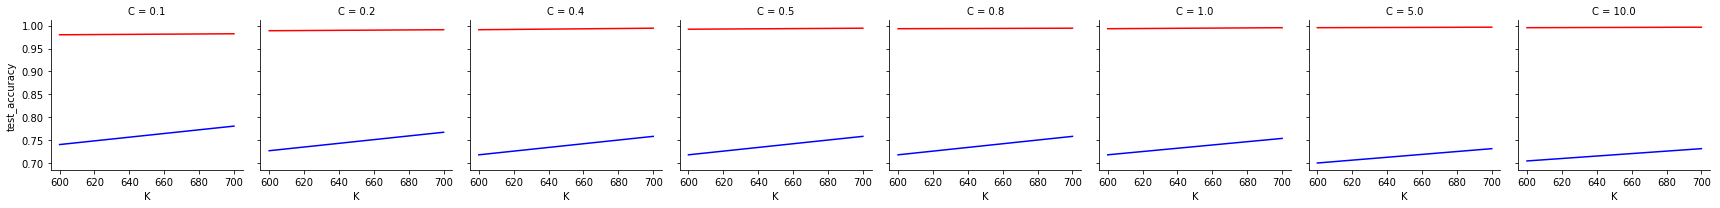

In [7]:
g = sns.FacetGrid(lr_data, col='C')
g.map(plt.plot, 'K', "train_accuracy", color="r")
g.map(plt.plot, 'K', "test_accuracy", color="b")
plt.show()

In [9]:
tf_lr_data = get_plot_data_tf_lr(training_tf_lr, testing_tf_lr)

In [10]:
k, c, train_precision, test_precision = lr_data.iloc[tf_lr_data['test_accuracy'].idxmax()]
print('Best LR model: %s c value,  %s k value. %0.4f Training accuracy, %0.4f Testing accuracy.' % (c, k, train_precision, test_precision))

Best LR model: 0.2 c value,  600.0 k value. 0.9889 Training accuracy, 0.7265 Testing accuracy.


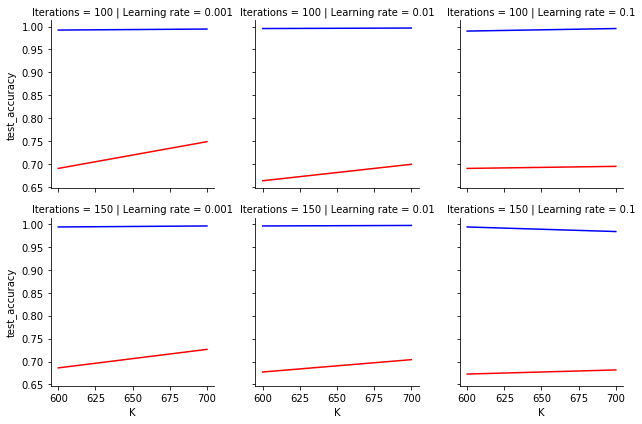

In [11]:
g = sns.FacetGrid(tf_lr_data, col='Learning rate', row='Iterations')
g.map(plt.plot, 'K', "train_accuracy", color="b")
g.map(plt.plot, 'K', "test_accuracy", color="r")
plt.show()

In [12]:
it, lr, train_precision, k, test_precision = tf_lr_data.iloc[tf_lr_data['test_accuracy'].idxmax()]
print('Best TF LR model: %s iterations, %s learning rate, %s k value. %0.4f Training accuracy, %0.4f Testing accuracy.' % (it, lr, k, train_precision, test_precision))

Best TF LR model: 100.0 iterations, 0.001 learning rate, 700.0 k value. 0.9945 Training accuracy, 0.7489 Testing accuracy.


# Tune LeNet-5 Model

In [13]:
imgs_train, labels_train, tf_img_names_train = get_images(train_dir, infer=False)
imgs_train, labels_train = transform_input(imgs_train, labels_train, infer=False)
#tf_lenet_model(imgs_train, labels_train, 'train', n_epochs=100)

In [14]:
imgs_test, labels_test, tf_img_names_test = get_images(test_dir, infer=False)
imgs_test, labels_test = transform_input(imgs_test, labels_test, infer=False)
#tf_lenet_model(imgs_test, labels_test, 'test')

In [15]:
for lr in learning_rates:
    print('Learning rate: ',lr)
    for epoch in iterations:
        print('# epochs: ' ,epoch)
        training_score = tf_lenet_model(imgs_train, labels_train, lr=lr, n_epochs=epoch, mode='train', verbose=False)
        testing_score = tf_lenet_model(imgs_test, labels_test, lr=lr, n_epochs=epoch, mode='test')
        training_tf_lenet[epoch].append(training_score)
        testing_tf_lenet[epoch].append(testing_score)

        if(testing_score>best_test_score_tf_lenet):
            best_test_score_tf_lenet = testing_score
            best_model_lenet_tf = {'lr': lr, 'epoch':epoch}

Learning rate:  0.001
# epochs:  100
Training accuracy:  1.0
INFO:tensorflow:Restoring parameters from /Users/juandanielmorales/Desktop/Kiwi2/German-Traffic-Signs-Detector/models/model3/saved/model3.ckpt
Testing accuracy:  0.938272
# epochs:  150
Training accuracy:  1.0
INFO:tensorflow:Restoring parameters from /Users/juandanielmorales/Desktop/Kiwi2/German-Traffic-Signs-Detector/models/model3/saved/model3.ckpt
Testing accuracy:  0.930041
Learning rate:  0.01
# epochs:  100
Training accuracy:  0.981443
INFO:tensorflow:Restoring parameters from /Users/juandanielmorales/Desktop/Kiwi2/German-Traffic-Signs-Detector/models/model3/saved/model3.ckpt
Testing accuracy:  0.872428
# epochs:  150
Training accuracy:  0.936082
INFO:tensorflow:Restoring parameters from /Users/juandanielmorales/Desktop/Kiwi2/German-Traffic-Signs-Detector/models/model3/saved/model3.ckpt
Testing accuracy:  0.868313
Learning rate:  0.1
# epochs:  100
Training accuracy:  0.0762887
INFO:tensorflow:Restoring parameters from 

In [16]:
best_model_lenet_tf

{'epoch': 100, 'lr': 0.001}